# Relatório

por Evandro Fontana Romeiro

Esse relatório tem por objetivo comparar o desempenho dos algoritmos heuristicos, busca-local, busca-global na resolução do problema "Maximin Share".

## CONCEITOS

### PROBLEMA
O problema "Maximin Share" trata-se da distribuição de objetos para um determinado número de pessoas. Cada objeto possui um determinado valor, concordado por todas as pessoas, e a distribuição é feita de forma que a pessoa que recebeu os objetos que somam o menor valor total receba o maior valor possível.

- Exemplo:
Caso queira distribuir três objetos de valores 25, 50 e 70 para duas pessoas. É impossível que que ambas as recebam objetos de forma que eles somem o mesmo valor. Uma possível distribuição seria dar os objetos de valor 25 e 70 (totalizando 95) para a primeira pessoa e o objeto de valor 50 para a segunda. Outra forma seria dar os objetos de valor 25 e 50 (totalizando 75) para a primeira pessoa e o objeto de valor 70 para a segunda. A segunda distribuição teria preferencia em relação a primeira segundo o "Maximin Share" pois a pessoa que recebeu o menor valor(MMS) recebeu mais.

### ALGORITMOS
- Heuristico
    - Nesse algoritmo é feita a ordenação dos objetos de forma decrescente com relação aos seus valores. Então distribui, em ordem, um para cada pessoa. 
- Busca-local
    - Nesse algoritmo é distribuido todos os objetos paras as pessoas de forma aleatória. Depois é feito um sistema de doação entre pessoas. Percorre-se todos os objetos de todas as pessoas, caso a pessoa sem esse objeto possua um valor total maior que o MMS, esse objeto é doado para a pessoa que possui o MMS. Isso ocorre até que nenhuma doação seja mais possível.
- Busca-global
    - Nesse algoritmo é feito por meio de recursão todas as possíbilidades de distribuição possíveis. Então é escolhida a de maior MMS.

In [60]:
import subprocess
import time
import matplotlib.pyplot as plt

"""
Função criada para rodar um algoritmo com um determinado teste.
Retorna os resultados do algormitmo e seu tempo de execução.
"""
def roda_com_entrada(executavel, arquivo_in):
    with open(f'{arquivo_in}') as f:
        start = time.perf_counter()
        proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

    return (proc.stdout or proc.stderr, end-start)

## TESTE DE DESEMPENHO

### TESTES
Os testes foram criados fixando o número de pessoas e crescendo de um em um o número de objetos para que os algoritmos possam ser comparados. Existem oito testes para cada número de pessoas (3, 5, 7 e 10 pessoas) sempre iniciando com um objeto a mais que pessoas. Por exemplo, para o número fixado de 5 pessoas existem testes com 6, 7, 8, ..., 12, 13 objetos.

O código abaixo cria um dicionário que armazena o número de objetos de cada teste para cada número fixo de pessoas.
Isso é feito abrindo cada um dos arquivo .txt e lendo o valor na primeira linha.

In [61]:
tamanhos_objetos = {}
for t in [3,5,7,10]:
    lista_tamanhos_objetos = []
    for i in range(0,8):
        with open(f'./testes/{t}/in{i}.txt') as f:
            linhas = f.readline()
            linhas = linhas.split()
            lista_tamanhos_objetos.append(linhas[0])
    tamanhos_objetos[t] = lista_tamanhos_objetos
print(tamanhos_objetos)

{3: ['4', '5', '6', '7', '8', '9', '10', '11'], 5: ['6', '7', '8', '9', '10', '11', '12', '13'], 7: ['8', '9', '10', '11', '12', '13', '14', '15'], 10: ['11', '12', '13', '14', '15', '16', '17', '18']}


### RODANDO OS ALGORITMOS

Foi criado um dicionário para armazenar o tempo de execução de cada teste e outro para o MMS. Os dicionários possuem a seguinte estrutura:
```
dic = {
    3 : lista_3,
    5 : lista_5,
    7 : lista_7,
    10 : lista_10
}
```
Os testes são rodados com o auxilio da função "roda_com_entrada" e seus resultados armazenados nos dicionários.<br>
Durante a execução dos testes, foi verificado que o tempo de execução é demasiadamente grande a partir de certo número de pessoas e objetos. Como em nada agregaria a esse relatório demonstrar com exatidão o tempo de execução do algoritmo busca-global para entradas grandes, os testes que teriam um grande tempo de execução não são executados e seus valores substituidos por tempo = 1000 e MMS = -1.


In [64]:
tempo_heuristico = {}
MMS_heuristico = {}
for t in [3,5,7,10]:    
    lista_tempo_heuristico = []
    lista_MMS_heuristico = []
    for i in range(0,8):
        res, tempo = roda_com_entrada('./algoritmos/heuristico', f'./testes/{t}/in{i}.txt')
        res = res.split()
        res = int(res[0])
        lista_tempo_heuristico.append(tempo)
        lista_MMS_heuristico.append(res)
    tempo_heuristico[t] = lista_tempo_heuristico
    MMS_heuristico[t] = lista_MMS_heuristico
print(tempo_heuristico)
print(MMS_heuristico)

{3: [0.015443936921656132, 0.012093492317944765, 0.006589180324226618, 0.012558986898511648, 0.008246236015111208, 0.01150873675942421, 0.010565494187176228, 0.010184330400079489], 5: [0.01329388888552785, 0.010689774062484503, 0.011779151856899261, 0.013861107174307108, 0.013052946422249079, 0.010399232152849436, 0.007807963062077761, 0.011756050866097212], 7: [0.012343440670520067, 0.013269583228975534, 0.008251616265624762, 0.010022921022027731, 0.010607440024614334, 0.007736450992524624, 0.00587920006364584, 0.006699407007545233], 10: [0.01043667085468769, 0.012187639251351357, 0.007979988120496273, 0.010697538033127785, 0.006775346584618092, 0.011290283873677254, 0.012846680823713541, 0.013052123133093119]}
{3: [28, 30, 35, 29, 46, 76, 48, 86], 5: [3, 14, 21, 25, 39, 28, 57, 38], 7: [3, 11, 23, 20, 16, 31, 24, 31], 10: [3, 5, 20, 13, 28, 15, 23, 21]}


In [63]:
tempo_local = {}
MMS_local = {}
for t in [3,5,7,10]:    
    lista_tempo_local = []
    lista_MMS_local = []
    for i in range(0,8):
        res, tempo = roda_com_entrada('./algoritmos/local', f'./testes/{t}/in{i}.txt')
        res = res.split()
        res = int(res[0])
        lista_tempo_local.append(tempo)
        lista_MMS_local.append(res)
    tempo_local[t] = lista_tempo_local
    MMS_local[t] = lista_MMS_local
print(tempo_local)
print(MMS_local)

{3: [0.056631550658494234, 0.05959429498761892, 0.08838950516656041, 0.09219201328232884, 0.10019489983096719, 0.1085197520442307, 0.13262940663844347, 0.127801351249218], 5: [0.07390415808185935, 0.09852839400991797, 0.12264130497351289, 0.11830725613981485, 0.16441341396421194, 0.1876450120471418, 0.1351497690193355, 0.22236460400745273], 7: [0.11070463294163346, 0.14329624781385064, 0.174410758074373, 0.16541731636971235, 0.22483275411650538, 0.1783884442411363, 0.24900497309863567, 0.2969067879021168], 10: [0.14103151997551322, 0.1752188391983509, 0.23567001102492213, 0.2930770139209926, 0.253299196716398, 0.39209508104249835, 0.33692920627072453, 0.34491515858098865]}
{3: [31, 33, 45, 48, 67, 86, 63, 110], 5: [4, 21, 32, 44, 50, 44, 71, 53], 7: [4, 18, 27, 39, 32, 48, 41, 48], 10: [4, 9, 25, 20, 36, 27, 39, 43]}


In [62]:
tempo_global = {}
MMS_global = {}
for t in [3,5,7,10]:
    lista_tempo_global = []
    lista_MMS_global = []
    for i in range(0,8):
        if(t**int(tamanhos_objetos[t][i]) < 5**13):
            res, tempo = roda_com_entrada('./algoritmos/global', f'./testes/{t}/in{i}.txt')
            res = res.split()
            res = int(res[0])
        else:
            res = -1
            tempo = 1000
        lista_tempo_global.append(tempo)
        lista_MMS_global.append(res)
    tempo_global[t] = lista_tempo_global
    MMS_global[t] = lista_MMS_global
print(tempo_global)
print(MMS_global)

{3: [0.013967908918857574, 0.012014614883810282, 0.007808491121977568, 0.008301272056996822, 0.009234706871211529, 0.015227672178298235, 0.01957945991307497, 0.0447755609638989], 5: [0.01845829887315631, 0.031207923777401447, 0.09375981707125902, 0.3463081349618733, 1.6220353180542588, 8.222366185858846, 1000, 1000], 7: [0.9968052064068615, 6.866448097862303, 1000, 1000, 1000, 1000, 1000, 1000], 10: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]}
{3: [31, 33, 45, 48, 67, 86, 63, 110], 5: [4, 21, 32, 44, 50, 44, -1, -1], 7: [4, 18, -1, -1, -1, -1, -1, -1], 10: [-1, -1, -1, -1, -1, -1, -1, -1]}


### COMPARAÇÃO DE DESEMPENHOS

Abaixo foram "plotados" os gráficos comparando os tempos e MMS de cada algoritmo para um número fixo de pessoas.

#### GRÁFICOS TEMPO

Abaixo será mostrado gráficos comparando os tempos de execução de cada um dos algoritmos e uma breve discussão a respeito de seus resultados.

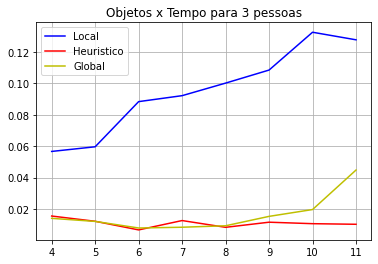

In [79]:
plt.plot(tamanhos_objetos[3], tempo_local[3], 'b-', label="Local")
plt.plot(tamanhos_objetos[3], tempo_heuristico[3], 'r-', label="Heuristico")
plt.plot(tamanhos_objetos[3], tempo_global[3], 'y-', label="Global")
plt.title("Objetos x Tempo para 3 pessoas")
plt.grid()
plt.legend()
plt.show()

No gráfico acima, vemos com perfeição que o tempo de execução da busca-local para 3 pessoas e até 11 objetos é sempre acima de seu concorrentes. Também vemos que o tempo de execução da busca-global e heuristico são bastante semelhantes para poucos objetos, mas que o tempo da busca-global cresce muito mais rapidamente com o crescimento dos objetos.

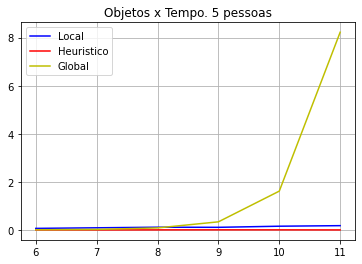

In [81]:
plt.plot(tamanhos_objetos[5][:6], tempo_local[5][:6], 'b-', label="Local")
plt.plot(tamanhos_objetos[5][:6], tempo_heuristico[5][:6], 'r-', label="Heuristico")
plt.plot(tamanhos_objetos[5][:6], tempo_global[5][:6], 'y-', label="Global")
plt.title("Objetos x Tempo. 5 pessoas")
plt.grid()
plt.legend()
plt.show()

Nesse gráfico, vemos claramente que o comportamento do tempo de excução da busca-global com o crescimento do número de objetos: um crescimento exponêncial. Também é possível observar que o tempo de execução da busca-local também cresce conforme o número de objetos e é sempre maior que o heuristico.

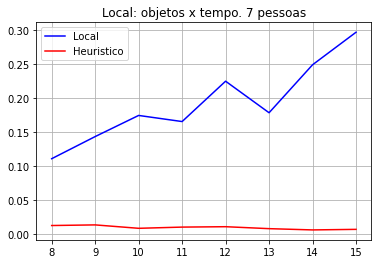

In [77]:
plt.plot(tamanhos_objetos[7], tempo_local[7], 'b-', label="Local")
plt.plot(tamanhos_objetos[7], tempo_heuristico[7], 'r-', label="Heuristico")
plt.title("Objetos x tempo. 7 pessoas")
plt.grid()
plt.legend()
plt.show()

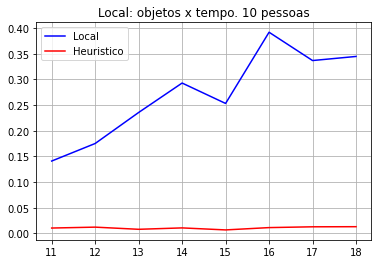

In [76]:
plt.plot(tamanhos_objetos[10], tempo_local[10], 'b-', label="Local")
plt.plot(tamanhos_objetos[10], tempo_heuristico[10], 'r-', label="Heuristico")
plt.title("Objetos x tempo. 10 pessoas")
plt.grid()
plt.legend()
plt.show()

- Nos gráficos para 7 e 10 pessoas, os altos valores de tempo de execução da busca-global impediriam a visualização dos outros algoritmos então eles foram suprimidos, mas vale lembrar que esses tempos são ordem de grandeza maiores que dos outros algoritmos.
- Nesses gráficos vemos a enorme rapidez do algoritmo heurisco comparada aos outros, tendo seu tempo praticamente constante para a pequenas variações de objetos.

### GRÁFICOS DE MMS

- Abaixo será mostrado gráficos comparando os resultados em termos de MMS de cada um dos algoritmos e uma breve discussão a respeito.
- Nesses gráficos devemos comparar os MMS teste a teste pois eles dependem do valor absoluto dos objetos de entrada, não fazendo sentido comparar o MMS do teste com 10 objetos com o MMS do teste com 11 objetos.

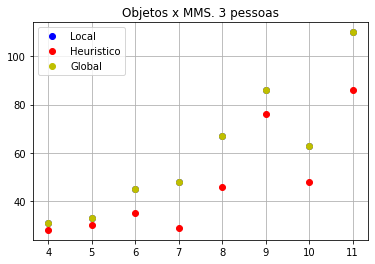

In [86]:
plt.plot(tamanhos_objetos[3], MMS_local[3], 'bo', label="Local")
plt.plot(tamanhos_objetos[3], MMS_heuristico[3], 'ro', label="Heuristico")
plt.plot(tamanhos_objetos[3], MMS_global[3], 'yo', label="Global")
plt.title("Objetos x MMS. 3 pessoas")
plt.grid()
plt.legend()
plt.show()

 Nesse gráfico todas as "bolinhas" que representam o MMS da busca-local se encontram sobrepostos pelos da busca-global. Isso mostra que o desempenho de ambos é igual e sempre melhor que do heuristica.

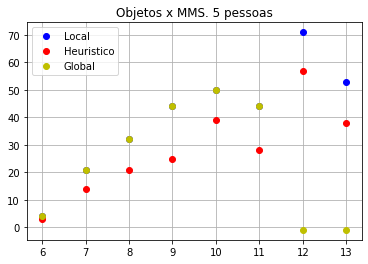

In [87]:
plt.plot(tamanhos_objetos[5], MMS_local[5], 'bo', label="Local")
plt.plot(tamanhos_objetos[5], MMS_heuristico[5], 'ro', label="Heuristico")
plt.plot(tamanhos_objetos[5], MMS_global[5], 'yo', label="Global")
plt.title("Objetos x MMS. 5 pessoas")
plt.grid()
plt.legend()
plt.show()

- As buscas local e global continuam sobrepostas até o sexto teste. Isso deixa de ocorrer no sétimo teste pois seu tempo de execução foi demasiado e seu MMS substituido por -1.
- É possivel verificar que o desempenho de ambas as buscas é sempre maior que o do heuristico.


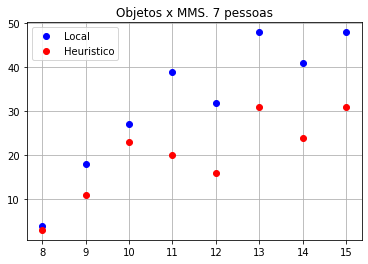

In [88]:
plt.plot(tamanhos_objetos[7], MMS_local[7], 'bo', label="Local")
plt.plot(tamanhos_objetos[7], MMS_heuristico[7], 'ro', label="Heuristico")
plt.title("Objetos x MMS. 7 pessoas")
plt.grid()
plt.legend()
plt.show()

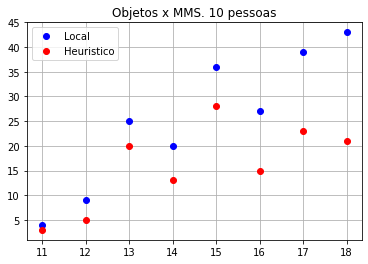

In [89]:
plt.plot(tamanhos_objetos[10], MMS_local[10], 'bo', label="Local")
plt.plot(tamanhos_objetos[10], MMS_heuristico[10], 'ro', label="Heuristico")
plt.title("Objetos x MMS. 10 pessoas")
plt.grid()
plt.legend()
plt.show()

- Nos gráficos para 7 e 10 pessoas, o MMS da busca-global não foi "plotado" junto com os outros algoritmos devido a seu alto tempo de execução.
- Continuamos a verificar que o MMS da busca-local é sempre maior que o do heuristico.

### CONCLUSÃO

- Podemos observar com clareza que o desempenho, em relação a maior MMS, da busca-global é sempre o maior possível fazendo desse algoritmo a melhor escolha quando a prioridade é alto desempenho. Entretanto também observando que seu tempo de execução cresce exponencialmente com relação ao número de pessoas e objetos, fazendo com que o algoritmo se torne inviável para entradas muito grandes.
- Em seu total oposto temos o heuristico que possuí tempo de execução praticamente constante para pequenas variações de objetos, porém tem seu desempenho sempre abaixo das outros algoritmos. Ele se destaca em situações em que a velocidade é prioridade, mas a exatidão do resultado não é essencial.
- Por fim temos a busca-local, que possui um desempenho tão bom quanto a global para os testes apresentados, mas possui um tempo de execução muito menor. Seu tempo de execução é maior que do heuristico, mas não é ordens de grandeza maior como a global.